# Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [What is Box Plot?]() <br>
3. [How to Interpret a Boxplot](#scrollTo=MByk8AzCS_Du)
4. [Use Cases of Boxplots](#scrollTo=EgUSTQDwSmB7)
5. [Install dependencies and import libraries](#scrollTo=r3qEuK0h6UtA&line=2&uniqifier=1)<br>
6.  [Dataset : Australia Data Science Jobs](#scrollTo=LWgS9ZpzcOnT) <br>
7.  [Exploring and Analyzing the Dataset](#scrollTo=LgmLr4OcfIGA&line=1&uniqifier=1) <br>
8.  [Task 1 : Distribution of estimated base salaries across Australia](#scrollTo=JMrbp5R_znb_&line=9&uniqifier=11) <br>
9.  [Task 2 : Visual Analysis of Salary Estimates(base, low, high) across Australia](#scrollTo=chvT7HCvTCT9&line=18&uniqifier=1)

</div>


# What is Box Plot

A boxplot (also called a box-and-whisker plot) is a graphical representation of a dataset’s distribution. It summarizes key statistical measures and helps in visualizing the spread and skewness of data, along with identifying potential outliers.

In [1]:
#@title Components of a Box Plot
from IPython.display import display, HTML

html_code = f"""
<!DOCTYPE html>
<html>
<body style="background: white; margin: 0; padding: 20px;">
  <div style="display: flex; gap: 40px; max-width: 1200px; margin: 0 auto;">
    <!-- Text Descriptions -->
    <div style="flex: 1;">
      <h2 style="color: #1e293b; margin-top: 0;">Box Plot Components</h2>

      <div style="color: #1e293b; font-size: 16px; line-height: 1.6; text-align: left;">
        <p><strong>1. Minimum (Lower Extreme):</strong> The smallest data point within the allowed range (not an outlier).</p>

        <p><strong>2. First Quartile (Q1 - 25th Percentile):</strong> The value below which 25% of the data falls. It represents the lower boundary of the interquartile range (IQR).</p>

        <p><strong>3. Median (Q2 - 50th Percentile):</strong> The middle value of the dataset when sorted. It divides the dataset into two equal halves.</p>

        <p><strong>4. Third Quartile (Q3 - 75th Percentile):</strong> The value below which 75% of the data falls. It represents the upper boundary of the interquartile range (IQR).</p>

        <p><strong>5. Maximum (Upper Extreme):</strong> The largest data point within the allowed range (not an outlier).</p>

        <p><strong>6. Interquartile Range (IQR):</strong> The IQR = Q3 - Q1 represents the spread of the middle 50% of the data. It is a measure of variability and helps in detecting outliers.</p>

        <p><strong>7. Whiskers:</strong> Extend from Q1 to the lowest data point within [Q1 - 1.5 × IQR] and from Q3 to the highest data point within [Q3 + 1.5 × IQR]. They help visualize the spread of the data outside the interquartile range.</p>

        <p><strong>8. Outliers:</strong> Any value below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR is considered an outlier. These are often shown as individual points on the plot.</p>
      </div>
    </div>

    <!-- SVG Box Plot -->
    <div style="flex: 1;">
      <svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 800 600" style="width: 100%; height: auto;">
        <!-- Gradient Definitions -->
        <defs>
            <linearGradient id="boxGradient" x1="0%" y1="0%" x2="100%" y2="0%">
                <stop offset="0%" style="stop-color:#6366f1;stop-opacity:0.8"/>
                <stop offset="100%" style="stop-color:#818cf8;stop-opacity:0.9"/>
            </linearGradient>
            <filter id="shadow" x="-20%" y="-20%" width="140%" height="140%">
                <feGaussianBlur in="SourceAlpha" stdDeviation="3"/>
                <feOffset dx="2" dy="2"/>
                <feComponentTransfer>
                    <feFuncA type="linear" slope="0.3"/>
                </feComponentTransfer>
                <feMerge>
                    <feMergeNode/>
                    <feMergeNode in="SourceGraphic"/>
                </feMerge>
            </filter>
        </defs>

        <!-- Box Plot Elements -->
        <!-- Main Box (IQR) -->
        <rect x="250" y="200" width="100" height="200" fill="url(#boxGradient)"
              stroke="#4f46e5" stroke-width="2" filter="shadow"/>

        <!-- Median Line -->
        <line x1="230" y1="300" x2="370" y2="300" stroke="#312e81" stroke-width="3"/>

        <!-- Whiskers -->
        <line x1="300" y1="150" x2="300" y2="200" stroke="#4f46e5" stroke-width="2"/>
        <line x1="300" y1="400" x2="300" y2="450" stroke="#4f46e5" stroke-width="2"/>
        <line x1="270" y1="150" x2="330" y2="150" stroke="#4f46e5" stroke-width="2"/>
        <line x1="270" y1="450" x2="330" y2="450" stroke="#4f46e5" stroke-width="2"/>

        <!-- Outliers -->
        <circle cx="300" cy="100" r="6" fill="#ef4444" filter="shadow"/>
        <circle cx="300" cy="500" r="6" fill="#ef4444" filter="shadow"/>

        <!-- Labels and Annotations -->
        <!-- Title -->
        <text x="400" y="50" text-anchor="middle" fill="#1e293b" font-size="24" font-weight="bold" filter="shadow">
            Vertical Box Plot Components
        </text>

        <!-- Component Labels -->
        <g font-size="14" fill="#475569">
            <g>
                <text x="420" y="100">Outlier (> Q3 + 1.5×IQR)</text>
                <line x1="310" y1="100" x2="410" y2="100" stroke="#94a3b8" stroke-width="1" stroke-dasharray="4"/>

                <text x="420" y="150">Maximum (Upper Extreme)</text>
                <line x1="310" y1="150" x2="410" y2="150" stroke="#94a3b8" stroke-width="1" stroke-dasharray="4"/>

                <text x="420" y="200">Third Quartile (Q3)</text>
                <line x1="350" y1="200" x2="410" y2="200" stroke="#94a3b8" stroke-width="1" stroke-dasharray="4"/>

                <text x="420" y="300">Median (Q2)</text>
                <line x1="350" y1="300" x2="410" y2="300" stroke="#94a3b8" stroke-width="1" stroke-dasharray="4"/>

                <text x="420" y="400">First Quartile (Q1)</text>
                <line x1="350" y1="400" x2="410" y2="400" stroke="#94a3b8" stroke-width="1" stroke-dasharray="4"/>

                <text x="420" y="450">Minimum (Lower Extreme)</text>
                <line x1="310" y1="450" x2="410" y2="450" stroke="#94a3b8" stroke-width="1" stroke-dasharray="4"/>

                <text x="420" y="500">Outlier (< Q1 - 1.5×IQR)</text>
                <line x1="310" y1="500" x2="410" y2="500" stroke="#94a3b8" stroke-width="1" stroke-dasharray="4"/>
            </g>

            <g text-anchor="end">
                <text x="230" y="300">IQR = Q3 - Q1</text>
                <text x="230" y="320">(Middle 50% of data)</text>
            </g>
        </g>

        <!-- Additional Annotations -->
        <g font-size="12" fill="#64748b">
            <text x="400" y="550" text-anchor="middle">Whiskers extend to the most extreme values within 1.5 × IQR</text>
            <text x="400" y="570" text-anchor="middle">Values beyond whiskers are considered outliers</text>
        </g>
      </svg>
    </div>
  </div>
</body>
</html>
"""

display(HTML(html_code))

# How to Interpret a Boxplot
*	If the median is closer to Q1, the data is right-skewed (longer tail on the right).
*	If the median is closer to Q3, the data is left-skewed (longer tail on the left).
*	If the whiskers are of equal length, the data is symmetrically distributed.
*	Outliers indicate data points that are significantly different from the rest of the dataset.
*	A shorter box suggests less variability, while a longer box suggests a higher spread in the data.

# Use Cases of Boxplots
Boxplots are widely used in various fields to:
1.	Compare distributions of a continuous variable across multiple groups (e.g., employee salaries in different departments).
2.	Identify outliers in datasets (e.g., unusually high or low values in financial transactions).
3.	Visualize the spread and skewness of data.
4.	Summarize large datasets in a simple and compact way.
5.	Check for symmetry or skewness in the distribution.

*`In this lab, we will focus on several real life examples on how to use box plots using a real world dataset. We will also experiment with difference attributes of pie chart for better visualization.`*

# Install dependencies and import libraries

In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

* The line ***`plt.style.use('ggplot')`*** is used to change the visual style of plots created using the matplotlib.pyplot module.
* ***`%matplotlib inline`*** ensures that plots generated by Matplotlib are displayed directly within the Jupyter Notebook, instead of opening in separate windows. This makes your visualizations easily viewable and integrated into your notebook's workflow.

# Dataset : Australia Data Science Jobs
The dataset titled “Australia Data Science Jobs,” available on Kaggle, provides a detailed compilation of job listings specific to data science roles across Australia. It includes essential information such as job titles, company names, locations, the dates the jobs were posted, and job descriptions. This dataset is invaluable for analyzing employment trends within the data science sector in Australia, gauging the demand for data science skills, and pinpointing which regions have the most job opportunities. Additionally, it offers insights into the qualifications and experiences sought by employers, making it a useful resource for individuals aiming to enter or progress in the data science field in Australia. For more details, you can view the dataset on [Kaggle](https://www.kaggle.com/datasets/nadzmiagthomas/australia-data-science-jobs/data).

In [4]:
dataset = pd.read_csv("/content/AustraliaDataScienceJobs.csv")
dataset.head()

,Job Title,Job Location,Company,Url,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,...,cassandra_yn,hive_yn,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn
0,Analyst,Melbourne,ANZ Banking Group,https://www.glassdoor.com.au/partner/jobListin...,95917,80000,115000,10000+ Employees,Company - Public,Finance,...,0,0,0,0,0,0,0,0,1,0
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,...,0,0,0,0,0,0,0,0,0,0
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,...,0,0,0,0,0,0,0,0,0,0
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,Melbourne,ANZ Banking Group,https://www.glassdoor.com.au/partner/jobListin...,115631,94000,143000,10000+ Employees,Company - Public,Finance,...,0,0,0,0,0,0,0,0,0,0


# Exploring and Analyzing the Dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job Title                      2085 non-null   object 
 1   Job Location                   2088 non-null   object 
 2   Company                        2088 non-null   object 
 3   Url                            2088 non-null   object 
 4   Estimate Base Salary           2088 non-null   int64  
 5   Low Estimate                   2088 non-null   int64  
 6   High Estimate                  2088 non-null   int64  
 7   Company Size                   1907 non-null   object 
 8   Company Type                   1907 non-null   object 
 9   Company Sector                 1521 non-null   object 
 10  Company Founded                1198 non-null   float64
 11  Company Industry               1521 non-null   object 
 12  Company Revenue                1907 non-null   o

We can see that the dataset contains 288 rows and 53 columns. Moreover, there are several columns having multiple null values. Therefore, we will check the sum of null values in both columns to further analyse the dataset.

In [6]:
dataset.isnull().sum()

,0
Job Title,3
Job Location,0
Company,0
Url,0
Estimate Base Salary,0
Low Estimate,0
High Estimate,0
Company Size,181
Company Type,181
Company Sector,567


We can see there are several columns with null values. Some of those columns are not important for data visualization and some columns are important having higher number of nulll values. For now we are going to preprocess only the columns we need for data visualization.
If a column has a high number of missing values, you may:

* Drop the column if it’s not useful.
* Fill missing values using mean, median, or mode.

# Task 1 : Distribution of estimated base salaries across Australia
This task aims to analyze the distribution of estimated base salaries for data science roles in Australia using a boxplot. The visualization helps in understanding the median salary, spread of salaries, and potential outliers in the dataset. This provides valuable insights into salary trends, helping job seekers and recruiters gauge typical earnings in the Australian data science job market

0


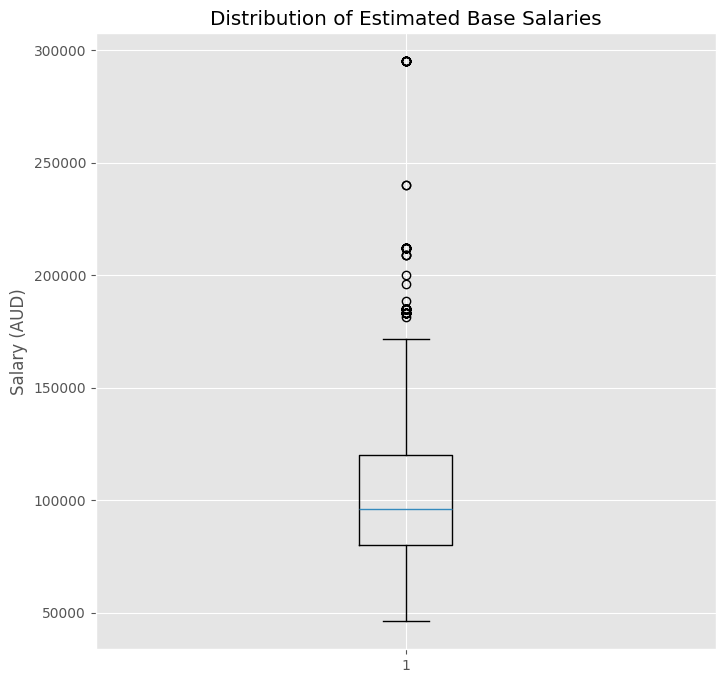

In [7]:
print(dataset['Estimate Base Salary'].isnull().sum())   # Check the null value

plt.figure(figsize=(8, 8))

# Create a horizontal boxplot for 'Estimate Base Salary' from the dataset
plt.boxplot(dataset['Estimate Base Salary'])

# Adjust layout for clarity
plt.ylabel('Salary (AUD)')
plt.title('Distribution of Estimated Base Salaries')
plt.show()

*We can immediately make a few key observations from the plot above:*
* The median estimated base salary is around **90,000 to 100,000 AUD**, indicating the central salary range for data science roles.
* The minimum salary (lower whisker) is around **45,000 AUD.**
* The maximum salary (upper whisker) is around **170,000 AUD,** excluding outliers.
* Q1 (25th percentile): Around **75,000 AUD**, indicating the lower bound of typical salaries.
* Q3 (75th percentile): Around **120,000** AUD, marking the higher bound of standard salaries.
* This range contains the middle **50%** of salaries in the dataset.
* Several outliers exceed **200,000** AUD, with extreme cases reaching **300,000** AUD.
* The distribution is right-skewed, meaning most salaries cluster below **120,000** AUD, but a few very high-paying roles significantly raise the overall range.




> ***We can make this box plot more visually appealing by adding some extra attributes. Let's explore the attributes with the below code.***



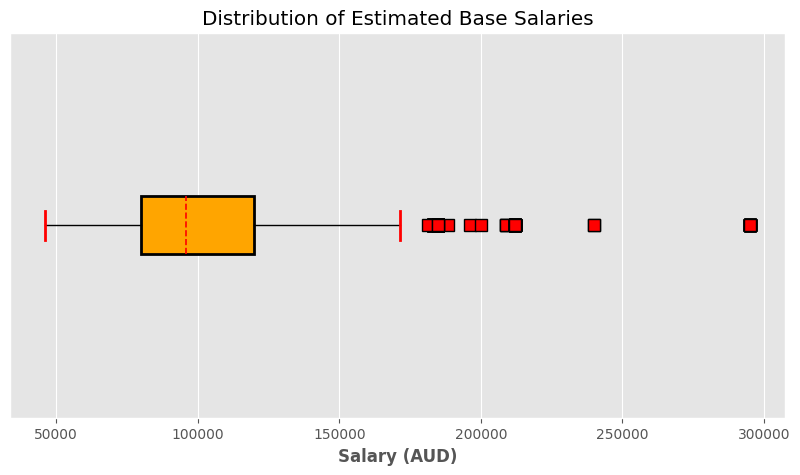

In [8]:
# Set the figure size to 10 inches by 5 inches
plt.figure(figsize=(10,5))

# Create a horizontal boxplot for 'Estimate Base Salary' from the dataset
plt.boxplot(
    dataset['Estimate Base Salary'],
    vert=False,  # Make the boxplot horizontal
    patch_artist=True,  # Allow filling of the boxplot with color
    boxprops=dict(facecolor='orange', color='black', linewidth=2),  # Style for the box face and outline
    medianprops=dict(color='red', linestyle='--', linewidth=1.2),  # Style for the median line
    capprops=dict(color='red', linewidth=2),  # Style for the caps at the end of the whiskers
    flierprops=dict(marker='s', markerfacecolor='red', markersize=8, markeredgecolor='black')  # Style for outlier points
)

# Label the x-axis (salary) with bold text
plt.xlabel('Salary (AUD)', fontweight='bold')

# Hide y-axis ticks since it's a single boxplot
plt.yticks([])

# Set a title for the plot
plt.title('Distribution of Estimated Base Salaries')

# Render the plot on the screen
plt.show()

# Task 2 : Visual Analysis of Salary Estimates(base, low, high) across Australia
This task involves creating a series of boxplots to visually analyze the distribution of estimated base salaries, as well as low and high salary estimates for data science positions across Australia. The objective is to identify the central tendencies, spread, and outliers in the salary data, providing insights into the overall compensation landscape within the data science sector.


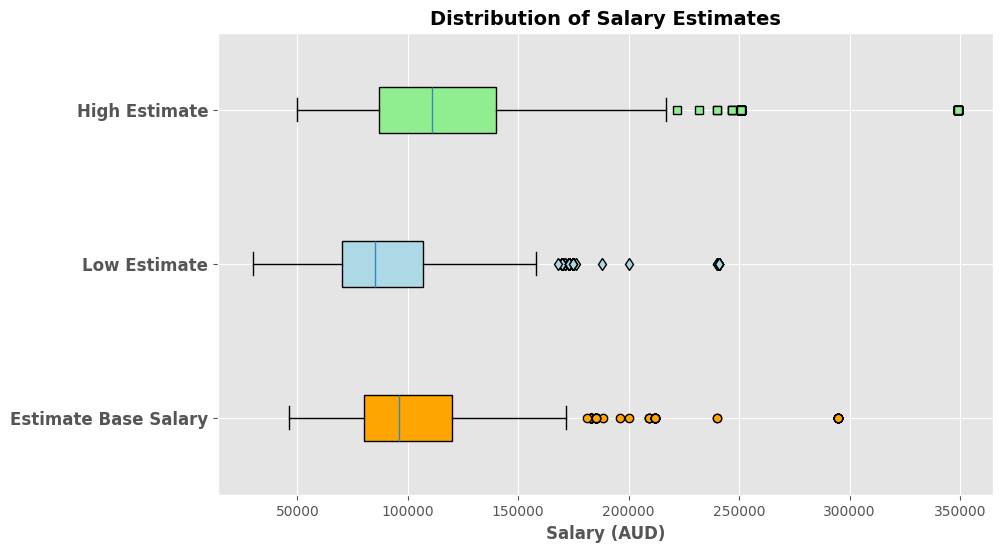

In [9]:
# Labels for each boxplot
labels = ['Estimate Base Salary', 'Low Estimate', 'High Estimate']

# Define custom colors for each box plot
colors = ['orange', 'lightblue', 'lightgreen']

# Define custom fliers(outliers) type for each box
flier_types = ['o', 'd', 's']

# Prepare the data for each salary column
data_to_plot = dataset[labels]

# Create a figure with a defined size
plt.figure(figsize=(10, 6))

# Create the boxplot with patch_artist=True to allow for custom fill colors
bp = plt.boxplot(data_to_plot, patch_artist=True, vert=False)

# Iterate over each box, outlier marker (flier), and color simultaneously using zip
for box, flier, color in zip(bp['boxes'], bp['fliers'], colors):
    box.set_facecolor(color)  # Sets the color of the box
    flier.set_markerfacecolor(color)  # Sets the color of the flier marker


for flier, flier_type in zip(bp['fliers'], flier_types):
    flier.set_marker(flier_type)  # Sets the type of flier marker


# Set x-axis tick labels with the specified labels
plt.yticks(np.arange(1, len(labels) + 1), labels, fontsize=12, fontweight='bold')

# Label the y-axis to indicate salary values in AUD
plt.xlabel('Salary (AUD)', fontsize=12, fontweight='bold')

# Set a title for the plot
plt.title('Distribution of Salary Estimates', fontsize=14, fontweight='bold')

# Display the final plot
plt.show()


***`Key Observations from the Boxplot Comparison:`***
*	High Estimate has the largest overall range and the highest median salary, with outliers extending above 300,000 AUD.
*	Low Estimate generally sits below High Estimate, but still shows outliers that reach well beyond 200,000 AUD.
*	Estimated Base Salary appears in between, with a median around the lower 100,000 AUD range and outliers that approach 200,000 AUD.
*	All three distributions exhibit right-skewness due to high‐value outliers, indicating a small number of significantly higher salaries in the dataset.

# Author
[Md. Arifuzzaman Munaf](https://www.linkedin.com/in/arifuzzaman-munaf/)